In [1]:
## import important libaries
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm, metrics,preprocessing
from sklearn.neighbors import KNeighborsClassifier
#from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc,classification_report
from matplotlib import pyplot as plt
from collections import Counter
from scipy.stats import norm
# import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
path="/home/sultan/EEG/Source_level_frequency_analysis/100_base_corr_sam_NHIerp_band_features_clear.csv"
## the below one is the band_features
##path="/home/sultan/EEG/Source_level_frequency_analysis/100sam_NHIerp_band_features_clear.csv"
# path="/home/sultan/EEG/Source_level_frequency_analysis/100sam_NHIerp_band_features_noise.csv"
dataset =pd.read_csv(path)

In [3]:
Xc=dataset.iloc[:,2:].values
y=dataset.iloc[:,1].values
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(Xc)

In [4]:
tt='_Adaboost'
rs=17

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=rs) 

In [6]:
X_test.shape, y_test.shape

((373, 272), (373,))

In [7]:
np.unique(y_test)
np.unique(y_test,return_counts=True)

(array([0., 1.]), array([154, 219]))

### Adaboost

In [39]:
clfknn = AdaBoostClassifier(n_estimators=50,learning_rate=1.0); ##0.6 and 1.0 is good
clfknn.fit(X_train, y_train)
predk=clfknn.predict(X_test)
acck=clfknn.score(X_test, y_test)
print ("Accuracy:", acck)  
print(confusion_matrix(y_test, predk))
print(classification_report(y_test, predk))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,predk)
roc_auck = auc(false_positive_rate, true_positive_rate)
print ('roc',roc_auck)

('Accuracy:', 0.900804289544236)
[[133  21]
 [ 16 203]]
             precision    recall  f1-score   support

        0.0       0.89      0.86      0.88       154
        1.0       0.91      0.93      0.92       219

avg / total       0.90      0.90      0.90       373

('roc', 0.8952885014528851)


### Whole brain accuracy and AUC

In [9]:
whc=pd.DataFrame([acck,roc_auck])
whc

,0
0,0.900804
1,0.895289


In [10]:
## whole brain level analysis
# whc=pd.DataFrame([acc,roc_auc,acck,roc_auck])
# whc

In [11]:
# cv=5
# from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[1],'gamma':[0.01 ]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters,cv=cv)
# clf.fit(X_train, y_train)

In [12]:
# X.shape
# np.max(acgw)

##### KNN Hemisphere

In [13]:
k=0;j=68; acgkw=[];
for i in range(0,4):
    clfknnw = AdaBoostClassifier(n_estimators=50,learning_rate=1)
    clfknnw.fit(X_train[:,k:j], y_train)
    predkw=clfknnw.predict(X_test[:,k:j])
    acckw=clfknnw.score(X_test[:,k:j], y_test)
    acgkw=np.append(acgkw,acckw)
    print acckw
    print k,j
    print(classification_report(y_test, predkw))
    k=k+68;j=j+68;

0.7506702412868632
0 68
             precision    recall  f1-score   support

        0.0       0.71      0.66      0.69       154
        1.0       0.77      0.81      0.79       219

avg / total       0.75      0.75      0.75       373

0.7613941018766756
68 136
             precision    recall  f1-score   support

        0.0       0.72      0.69      0.71       154
        1.0       0.79      0.81      0.80       219

avg / total       0.76      0.76      0.76       373

0.8203753351206434
136 204
             precision    recall  f1-score   support

        0.0       0.79      0.77      0.78       154
        1.0       0.84      0.86      0.85       219

avg / total       0.82      0.82      0.82       373

0.8793565683646113
204 272
             precision    recall  f1-score   support

        0.0       0.87      0.84      0.85       154
        1.0       0.89      0.91      0.90       219

avg / total       0.88      0.88      0.88       373



In [14]:
acgkw

array([0.75067024, 0.7613941 , 0.82037534, 0.87935657])

# Hemisphere

### LH

### Knnlh Hemisphere

In [15]:
a=range(0,(X.shape[1]),2)
d11=X[:,a];
X_train, X_test, y_train, y_test = train_test_split(d11,y, test_size=.20, random_state=rs) 
clfknnlh = AdaBoostClassifier(n_estimators=50,learning_rate=1)
clfknnlh.fit(X_train, y_train)
predklh=clfknnlh.predict(X_test)
accklh=clfknnlh.score(X_test, y_test)
print ("Accuracy:", accklh)  
print(confusion_matrix(y_test, predklh))
print(classification_report(y_test, predklh))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,predklh)
roc_aucklh = auc(false_positive_rate, true_positive_rate)
print ('roc',roc_aucklh)

('Accuracy:', 0.8900804289544236)
[[126  28]
 [ 13 206]]
             precision    recall  f1-score   support

        0.0       0.91      0.82      0.86       154
        1.0       0.88      0.94      0.91       219

avg / total       0.89      0.89      0.89       373

('roc', 0.8794105437941054)


In [16]:
lhacau=pd.DataFrame([accklh,roc_aucklh])
lhacau

,0
0,0.890080
1,0.879411


In [17]:
# only 34 features 
k=0;j=34; acgklh=[];
for i in range(0,4):
    clfknnlh = AdaBoostClassifier(n_estimators=50,learning_rate=1)
    clfknnlh.fit(X_train[:,k:j], y_train)
    predklh=clfknnlh.predict(X_test[:,k:j])
    accklh=clfknnlh.score(X_test[:,k:j], y_test)
    acgklh=np.append(acgklh,accklh)
    print ('Acc:',accklh)
    print k,j
    print(classification_report(y_test, predklh))
    k=k+34;j=j+34;

('Acc:', 0.7345844504021448)
0 34
             precision    recall  f1-score   support

        0.0       0.71      0.60      0.65       154
        1.0       0.75      0.83      0.79       219

avg / total       0.73      0.73      0.73       373

('Acc:', 0.7345844504021448)
34 68
             precision    recall  f1-score   support

        0.0       0.71      0.60      0.65       154
        1.0       0.75      0.83      0.79       219

avg / total       0.73      0.73      0.73       373

('Acc:', 0.7667560321715817)
68 102
             precision    recall  f1-score   support

        0.0       0.74      0.67      0.70       154
        1.0       0.78      0.84      0.81       219

avg / total       0.77      0.77      0.76       373

('Acc:', 0.8659517426273459)
102 136
             precision    recall  f1-score   support

        0.0       0.84      0.83      0.84       154
        1.0       0.88      0.89      0.89       219

avg / total       0.87      0.87      0.87       373

In [18]:
# acgklh

In [19]:
## 

### RH

# knnrh

In [20]:
a=range(1,(X.shape[1]),2)
d11=X[:,a];
X_train, X_test, y_train, y_test = train_test_split(d11,y, test_size=.20, random_state=rs) 
clfknnrh = AdaBoostClassifier(n_estimators=50,learning_rate=1)
clfknnrh.fit(X_train, y_train)
predkrh=clfknnrh.predict(X_test)
acckrh=clfknnrh.score(X_test, y_test)
print ("Accuracy:", acckrh)  
print(confusion_matrix(y_test, predkrh))
print(classification_report(y_test, predkrh))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,predkrh)
roc_auckrh = auc(false_positive_rate, true_positive_rate)
print ('roc',roc_auckrh)

('Accuracy:', 0.8150134048257373)
[[115  39]
 [ 30 189]]
             precision    recall  f1-score   support

        0.0       0.79      0.75      0.77       154
        1.0       0.83      0.86      0.85       219

avg / total       0.81      0.82      0.81       373

('roc', 0.8048834726916918)


In [21]:
rhacau=pd.DataFrame([acckrh,roc_auckrh])
rhacau

,0
0,0.815013
1,0.804883


In [22]:
# only 34 features 
k=0;j=34; acgkrh=[];
for i in range(0,4):
    clfknnrh = AdaBoostClassifier(n_estimators=50,learning_rate=1)
    clfknnrh.fit(X_train[:,k:j], y_train)
    predkrh=clfknnrh.predict(X_test[:,k:j])
    acckrh=clfknnrh.score(X_test[:,k:j], y_test)
    acgkrh=np.append(acgkrh,acckrh)
    print ('acc:',acckrh)
    print k,j
    print(classification_report(y_test, predkrh))
    k=k+34;j=j+34;

('acc:', 0.7050938337801609)
0 34
             precision    recall  f1-score   support

        0.0       0.64      0.64      0.64       154
        1.0       0.75      0.75      0.75       219

avg / total       0.71      0.71      0.71       373

('acc:', 0.7265415549597856)
34 68
             precision    recall  f1-score   support

        0.0       0.66      0.68      0.67       154
        1.0       0.77      0.76      0.76       219

avg / total       0.73      0.73      0.73       373

('acc:', 0.7640750670241286)
68 102
             precision    recall  f1-score   support

        0.0       0.72      0.70      0.71       154
        1.0       0.79      0.81      0.80       219

avg / total       0.76      0.76      0.76       373

('acc:', 0.7801608579088471)
102 136
             precision    recall  f1-score   support

        0.0       0.75      0.71      0.73       154
        1.0       0.80      0.83      0.82       219

avg / total       0.78      0.78      0.78       373

In [23]:
t=np.linspace(0,3,4, endpoint=True)
time=pd.DataFrame(t)
# a=pd.concat([time,pd.DataFrame(acgw),pd.DataFrame(acgl),pd.DataFrame(acgr)],axis=1, keys=[ 'time',"Whole", "LH", "RH"])
a=pd.concat([time,pd.DataFrame(acgkw),pd.DataFrame(acgklh),pd.DataFrame(acgkrh)],axis=1, keys=[ 'time',"Whole", "LH", "RH"])

In [24]:
# np.max(acgklh)
np.max(a.iloc[:,3])

0.7801608579088471

In [25]:
# wpath="/home/sultan/EEG/Source_level_frequency_analysis/Results/"
# dall=a
# # dall.to_csv(wpath+'svm_res_100sam_10ms_clear_v1.csv')
# dall.to_csv(wpath+'svm_res_band_100sam_clear_v1.csv')

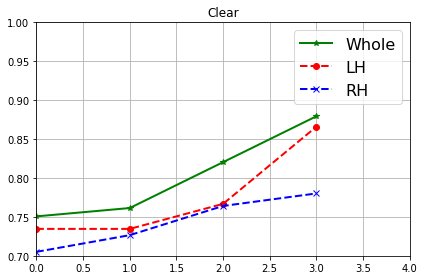

In [26]:
axis_font = {'fontname':'Arial', 'size':'15'}
#tw1=tad.iloc[1:,0];Acdw1=tad.iloc[1:,1];
tw1=a.iloc[0:,0];Acdw=a.iloc[0:,1];Acdlh=a.iloc[0:,2];Acdrh=a.iloc[0:,3]
# plt.plot(tw1,Acdw1,c='g')
plt.plot(tw1,Acdw,'g',linewidth=2,marker='*')
plt.plot(tw1, Acdlh,'--r',linewidth=2,marker='o')
plt.plot(tw1, Acdrh,'--b',linewidth=2,marker='x')
plt.title("Clear")
plt.xlim(0,4)
plt.ylim(0.7,1)
plt.grid(True)
plt.tight_layout()
plt.gca().legend(('Whole','LH','RH'),fontsize=16,loc='best')
# plt.savefig('whole_acc_timem.eps')
# plt.savefig('whole_acc_timem.tif')
plt.show()

In [27]:
## Ffe: Fulll features altogether
Ffe=pd.concat([whc,lhacau,rhacau],axis=1, keys=[ "Whole", "LH", "RH"])
Ffe

,Whole,LH,RH
,0,0,0
0,0.900804,0.890080,0.815013
1,0.895289,0.879411,0.804883


In [28]:
## bb: is the sub band frequency
bb=a.iloc[:,1:]

In [29]:
## Here the 1st and 2nd rows are accand roc for full brain
## Here from 3rd row theta,alpha beta,and gamma
# wrpath="/home/sultan/EEG/Source_level_frequency_analysis/Results/"
bandallclean=pd.concat([Ffe*100,bb*100],axis=0)
# # bandallclean.iloc[0:,:]
bandallclean
# bandallclean.to_csv(wrpath+str(rs)+'Clear_band.csv')

,Whole,LH,RH
,0,0,0
0,90.080429,89.008043,81.501340
1,89.528850,87.941054,80.488347
0,75.067024,73.458445,70.509383
1,76.139410,73.458445,72.654155
2,82.037534,76.675603,76.407507
3,87.935657,86.595174,78.016086


#### Writing into a csv file

In [30]:
# wrpath="/home/sultan/EEG/Source_level_frequency_analysis/Results/"
# bandallclean=pd.concat([Ffe*100,bb*100],axis=0)
# # bandallclean.iloc[0:,:]
# bandallclean
# bandallclean.to_csv(wrpath+str(rs)+tt+'_Clear_band.csv')
# wrpath+str(rs)+tt+'_Clear_band.csv'

In [31]:
rs

17